In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
epochs = 100

In [3]:
# データをつくる
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=90, width_shift_range=0.2, height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
train_generator = train_datagen.flow_from_directory('../data/butterflyfish/train', target_size=(150,150), 
                                                    batch_size=32, class_mode='binary')

Found 200 images belonging to 2 classes.


In [5]:
validation_generator = test_datagen.flow_from_directory('../data/butterflyfish/validation', target_size=(150,150), 
                                                        batch_size=32, class_mode='binary')

Found 60 images belonging to 2 classes.


In [6]:
# モデルをつくる
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit_generator(train_generator, epochs=epochs, verbose=1, validation_data=validation_generator)

Epoch 1/100
7/7 [==============================] - 3s 398ms/step - loss: 0.7356 - acc: 0.4966 - val_loss: 0.6748 - val_acc: 0.7333
Epoch 2/100
7/7 [==============================] - 1s 119ms/step - loss: 0.6804 - acc: 0.6095 - val_loss: 0.6727 - val_acc: 0.5833
Epoch 3/100
7/7 [==============================] - 1s 128ms/step - loss: 0.6625 - acc: 0.6250 - val_loss: 0.6355 - val_acc: 0.6833
Epoch 4/100
7/7 [==============================] - 1s 130ms/step - loss: 0.6388 - acc: 0.6613 - val_loss: 0.5720 - val_acc: 0.8000
Epoch 5/100
7/7 [==============================] - 1s 130ms/step - loss: 0.6174 - acc: 0.6514 - val_loss: 0.5833 - val_acc: 0.7167
Epoch 6/100
7/7 [==============================] - 1s 128ms/step - loss: 0.5923 - acc: 0.7175 - val_loss: 0.5009 - val_acc: 0.8500
Epoch 7/100
7/7 [==============================] - 1s 129ms/step - loss: 0.5479 - acc: 0.7345 - val_loss: 0.5216 - val_acc: 0.6833
Epoch 8/100
7/7 [==============================] - 1s 131ms/step - loss: 0.5482 - a

7/7 [==============================] - 1s 131ms/step - loss: 0.3274 - acc: 0.8433 - val_loss: 0.5130 - val_acc: 0.8333
Epoch 64/100
7/7 [==============================] - 1s 127ms/step - loss: 0.2895 - acc: 0.8452 - val_loss: 0.4918 - val_acc: 0.8333
Epoch 65/100
7/7 [==============================] - 1s 132ms/step - loss: 0.2689 - acc: 0.8795 - val_loss: 0.4090 - val_acc: 0.8333
Epoch 66/100
7/7 [==============================] - 1s 129ms/step - loss: 0.2827 - acc: 0.8912 - val_loss: 0.5610 - val_acc: 0.8333
Epoch 67/100
7/7 [==============================] - 1s 129ms/step - loss: 0.2983 - acc: 0.8334 - val_loss: 0.5248 - val_acc: 0.8500
Epoch 68/100
7/7 [==============================] - 1s 129ms/step - loss: 0.2814 - acc: 0.8705 - val_loss: 0.5171 - val_acc: 0.8500
Epoch 69/100
7/7 [==============================] - 1s 129ms/step - loss: 0.2722 - acc: 0.9003 - val_loss: 0.5504 - val_acc: 0.8333
Epoch 70/100
7/7 [==============================] - 1s 129ms/step - loss: 0.2665 - acc: 0

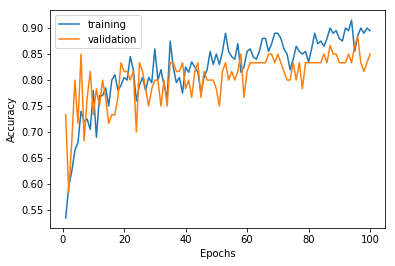

In [10]:
plt.plot(range(1, epochs+1), history.history['acc'], label="training")
plt.plot(range(1, epochs+1), history.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()